Plotting
===

## Unit 6, Lecture 1


*Numerical Methods and Statistics*

----

#### Prof. Andrew White, Feb 20, 2018

Plotting Probability Distributions
====

Let's plot the probability distributions we just learned. First we have to import our tools:

In [5]:
%matplotlib inline
#the line above is for ipython notebooks only - makes plots appear in our notebook
import matplotlib.pyplot as plt #we import a sub-module called pyplot and call it plt for short
import numpy as np #import numpy

Bernoulli Distribution
----

The Bernoulli has a state space of 2, so this would be best suited to a bargraph. Bargraphs are good to use when the state space is **discrete** and small.

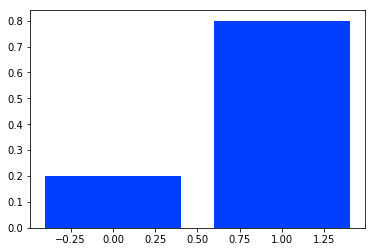

In [6]:
p = 0.8
bar_loc = [0,1]
height = [1 - p, p]
plt.bar(bar_loc, height)
plt.show()

The x-axis is a little strange though; the labels don't really make sense. You can set them via a list in fact:

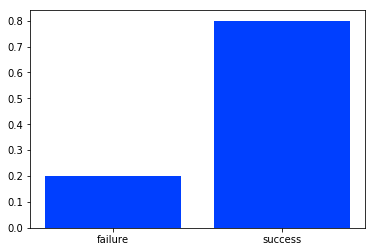

In [7]:
labels = ['failure', 'success']
plt.bar(bar_loc, height, tick_label=labels)
plt.show()

Better!

Geometric Distribution
----

The geometric distribution is **discrete** and can go from 1 to $\infty$

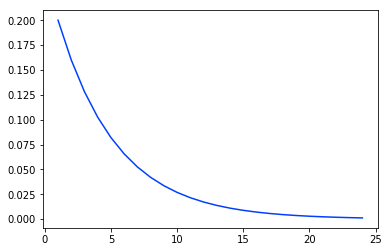

In [8]:
plt.style.use('seaborn-bright')
n = np.arange(1, 25)
p = 0.2
pn = (1 - p)**(n - 1) * p

plt.plot(n, pn)
plt.show()

There is a problem with this graph - it appears the the distribution is continuous and it starts at 0. We change this by using matplolib's line styling strings:

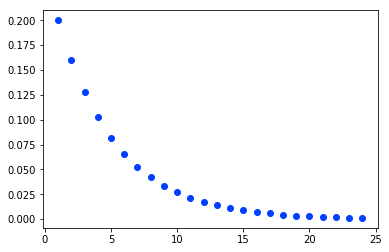

In [9]:
plt.plot(n, pn, 'o')
plt.show()

The 'o' makes it so little os appear. There are other characters as well, like '+'. '-' makes a line. You can mix them too:

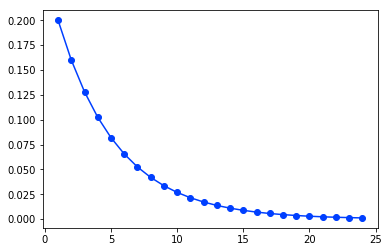

In [10]:
plt.plot(n, pn, '-o')
plt.show()

There are also color codes, which are single letters that go before the marking specifier

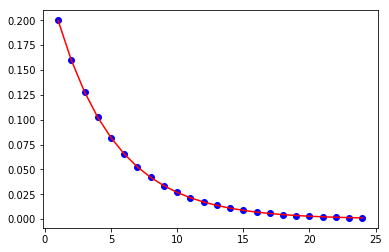

In [11]:
plt.plot(n, pn, 'bo')
plt.plot(n, pn, 'r-')
plt.show()

To adjust the axis limits, use these functions:

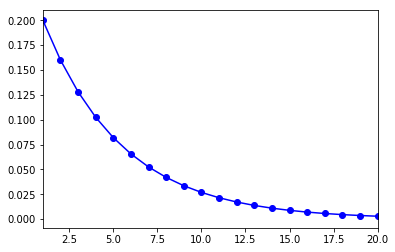

In [12]:
plt.plot(n, pn, 'bo-')
plt.xlim(1, 20)
plt.show()

Sometimes you don't want to squish all the color and marker codes together. You can specify separately like so:

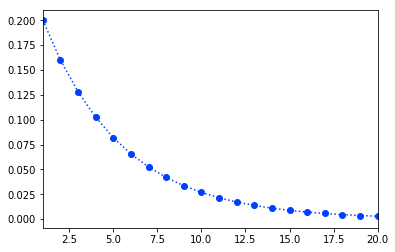

In [13]:
plt.plot(n, pn, marker='o', linestyle=':')
plt.xlim(1, 20)
plt.show()

Binomial Distribution
-----

The binomial distribution is **discrete** and goes from $0$ to $N$. It's the number of successes in $N$ trials.

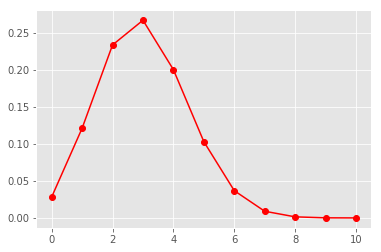

In [14]:
plt.style.use('ggplot')
from scipy.misc import comb
N = 10
p = 0.3
n = np.arange(0, N+1)
pn = comb(N, n) * p**n * (1 - p)**(N - n)

plt.plot(n, pn, 'ro-')
plt.show()

Notice that `comb` is a scipy function, so it knows how to deal with arrays. To get the same thing without using arrays, we would have to use a for loop

Poisson Distribution
----

The Poisson distribution is often an approximation to a normal distribution. For example, let's say we're playing the lottery and 650 million people have a ticket. The odds of winning are 1 in 300 million.

$$\mu = Np = \frac{650}{300}$$

The sample space is $0$ to $\infty$ and it is discrete. 

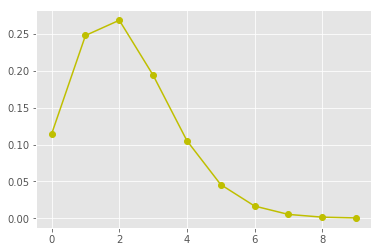

In [15]:
from scipy.misc import factorial
mu = 650 / 300.
n = np.arange(0, 10)
pn = np.exp(-mu) * mu**n / factorial(n)

plt.plot(n, pn, 'yo-')
plt.show()

Further Plotting Details
===



Adding LaTeX
---

As you saw in recitation you may add LaTeX

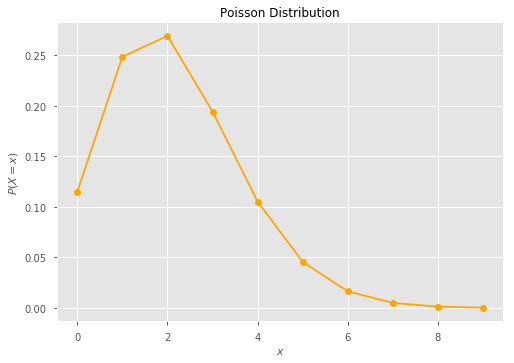

In [16]:
plt.style.use('seaborn-notebook')
plt.plot(n, pn, marker='o', linestyle='-', color='orange')
plt.title('Poisson Distribution')
plt.xlabel('$x$')
plt.ylabel('$P(X = x)$')
plt.show()

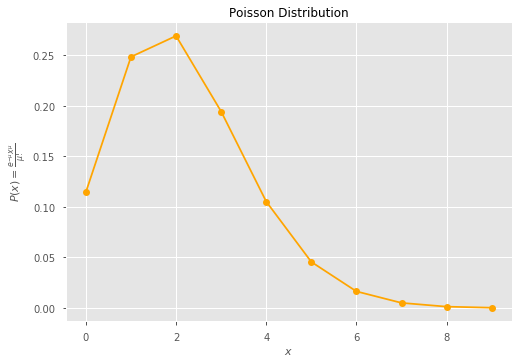

In [17]:
plt.plot(n, pn, marker='o', linestyle='-', color='orange')
plt.title('Poisson Distribution')
plt.xlabel('$x$')
plt.ylabel(r'$P(x) = \frac{e^{-\mu} x^\mu}{\mu!}$')
plt.show()

Adding Vertical/Horizontal Lines
----

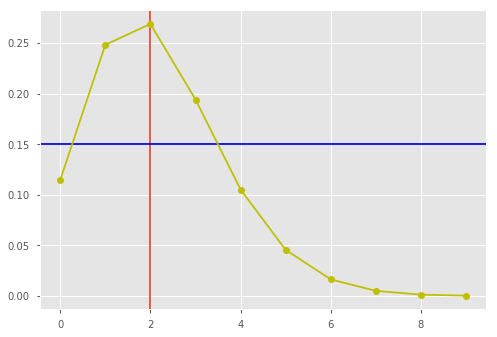

In [18]:
plt.axvline(x=2)
plt.axhline(y=0.15, color='blue')
plt.plot(n, pn, 'yo-')
plt.show()

Creating Legends
====

Legends can be automatically placed 

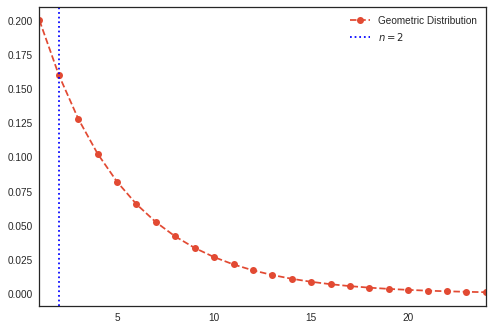

In [19]:
plt.style.use('seaborn-white')
n = np.arange(1, 25)
p = 0.2
Pn = (1 - p)**(n - 1) * p

plt.plot(n, Pn, label='Geometric Distribution', marker='o', linestyle='--')
plt.axvline(x=2, label='$n=2$', color='blue', linestyle=':')
plt.xlim(1,24)

plt.legend()
plt.show()

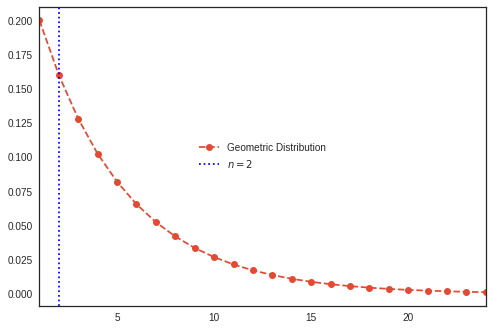

In [20]:
n = np.arange(1, 25)
p = 0.2
Pn = (1 - p)**(n - 1) * p

plt.plot(n, Pn, label='Geometric Distribution', marker='o', linestyle='--')
plt.axvline(x=2, label='$n=2$', color='blue', linestyle=':')
plt.xlim(1,24)

plt.legend(loc='center')
plt.show()

One of the nice features of labels is that you can use the result of your calculation to be a label

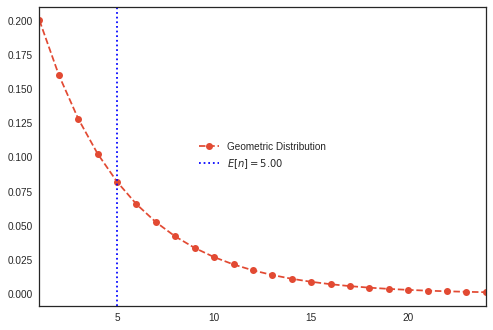

In [21]:
expected_value = 1 / p

plt.plot(n, Pn, label='Geometric Distribution', marker='o', linestyle='--')
plt.axvline(x=expected_value, label='$E[n] = {:.2f}$'.format(expected_value), color='blue', linestyle=':')
plt.xlim(1,24)

plt.legend(loc='center')
plt.show()

You'll notice that the $E$ is italicized. That's because LaTeX treats it as a variable. We can get it to look normal by just taking it out of the enclosing `$`

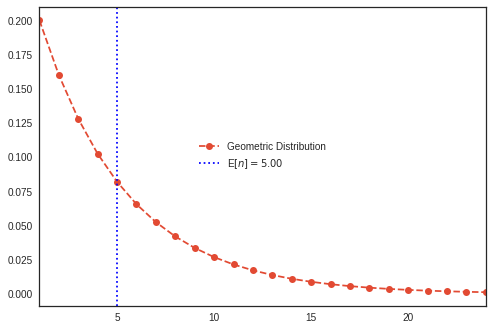

In [22]:
plt.plot(n, Pn, label='Geometric Distribution', marker='o', linestyle='--')
plt.axvline(x=expected_value, label='E$[n] = {:.2f}$'.format(expected_value), color='blue', linestyle=':')
plt.xlim(1,24)

plt.legend(loc='center')
plt.show()

LaTeX String Mangling
===

You'll notice that the curly braces can be used for two things: Python string formatting OR LaTeX operators. Sometimes this can lead to conflicts:

KeyError: '-1'

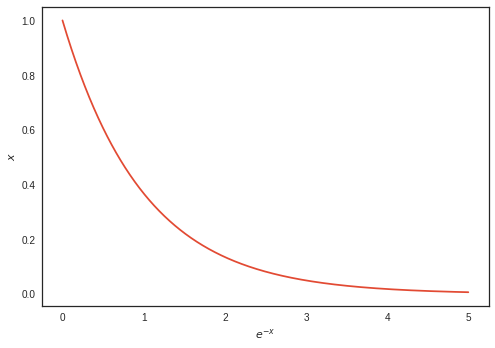

In [23]:
x = np.linspace(0,5, 1000)
y = np.exp(-x)
plt.plot(x, y)
plt.ylabel('$x$')
plt.xlabel('$e^{-x}$')
plt.axhline(y=np.exp(-1), label='$e^{-1} = {:.3f}$'.format(np.exp(-1)))
plt.legend()
plt.show()

To get a curly brace past Python, just double-up:

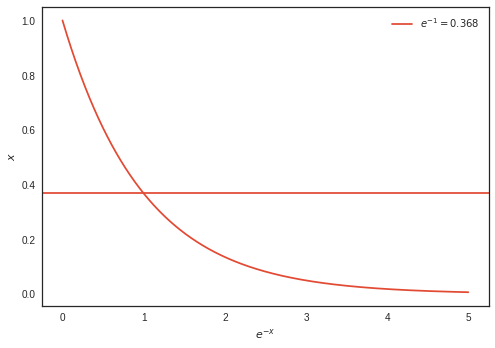

In [24]:
x = np.linspace(0,5, 1000)
y = np.exp(-x)
plt.plot(x, y)
plt.ylabel('$x$')
plt.xlabel('$e^{-x}$')
plt.axhline(y=np.exp(-1), label='$e^{{-1}} = {:.3f}$'.format(np.exp(-1)))
plt.legend(loc='best')
plt.show()